In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])


In [9]:
def copmute_cost(x,y,w,b):
    m = x.shape[0]
    total_cost = 0
    for i in range(m):
        f_wb = w*x[i]+b
        total_cost += (y[i]-f_wb)**2
    
    total_cost = total_cost/(2*m)
    return total_cost

In [4]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = (w*x+b-y).T @ x / m
    dj_db = (w*x+b-y).T @ np.ones(m) / m
    return dj_dw, dj_db

In [10]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iter, cost_func, gradient_func):
    w = w_in
    b = b_in

    j_history = []
    p_history = []

    for i in range(num_iter):
        dj_dw, dj_db = gradient_func(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000 :
            j_history.append(cost_func(x,y,w,b))
            p_history.append([w,b])
        
        if i % math.ceil(num_iter/10) == 0:
            print(f"iteration {i:4}, cost is {j_history[-1]:0.2e};",
            f"dj_dw is {dj_dw: 0.3e}, dj_db is {dj_db:0.3e}",
            f" w is {w:0.2e}, b is {b:0.2e}")
        
    
    return w, b, j_history, p_history


### Parameters
- Initialize parameters and set learning rate $alpha$ to 0.01

In [11]:
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 1.0e-2

w_final, b_final, j_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init,tmp_alpha,iterations,copmute_cost, compute_gradient)
print(f"final outcome is w as {w_final:8.4f}, b as {b_final:8.4f}, cost as {j_hist[-1]:8.4f}")

iteration    0, cost is 7.93e+04; dj_dw is -6.500e+02, dj_db is -4.000e+02  w is 6.50e+00, b is 4.00e+00
iteration 1000, cost is 3.41e+00; dj_dw is -3.712e-01, dj_db is 6.007e-01  w is 1.95e+02, b is 1.08e+02
iteration 2000, cost is 7.93e-01; dj_dw is -1.789e-01, dj_db is 2.895e-01  w is 1.98e+02, b is 1.04e+02
iteration 3000, cost is 1.84e-01; dj_dw is -8.625e-02, dj_db is 1.396e-01  w is 1.99e+02, b is 1.02e+02
iteration 4000, cost is 4.28e-02; dj_dw is -4.158e-02, dj_db is 6.727e-02  w is 1.99e+02, b is 1.01e+02
iteration 5000, cost is 9.95e-03; dj_dw is -2.004e-02, dj_db is 3.243e-02  w is 2.00e+02, b is 1.00e+02
iteration 6000, cost is 2.31e-03; dj_dw is -9.660e-03, dj_db is 1.563e-02  w is 2.00e+02, b is 1.00e+02
iteration 7000, cost is 5.37e-04; dj_dw is -4.657e-03, dj_db is 7.535e-03  w is 2.00e+02, b is 1.00e+02
iteration 8000, cost is 1.25e-04; dj_dw is -2.245e-03, dj_db is 3.632e-03  w is 2.00e+02, b is 1.00e+02
iteration 9000, cost is 2.90e-05; dj_dw is -1.082e-03, dj_db is

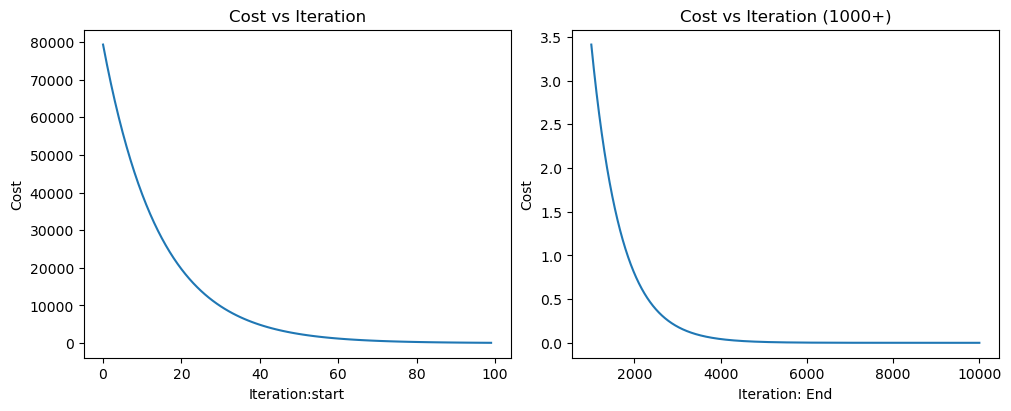

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, constrained_layout = True, figsize=(10,4))
ax1.plot(j_hist[:100])
ax2.plot(1000+np.arange(len(j_hist[1000:])), j_hist[1000:])
ax1.set_title("Cost vs Iteration") ; ax2.set_title("Cost vs Iteration (1000+)")
ax1.set_xlabel("Iteration:start") ; ax2.set_xlabel("Iteration: End")
ax1.set_ylabel("Cost") ; ax2.set_ylabel("Cost")
plt.show()

In [19]:
print(f"1000 sqft house predicted price: {w_final*1.0+b_final:0.2f} thousand dollars")
print(f"1200 sqft house predicted price: {w_final*1.2+b_final:0.2f} thousand dollars")
print(f"2000 sqft house predicted price: {w_final*2.0+b_final:0.2f} thousand dollars")

1000 sqft house predicted price: 300.00 thousand dollars
1200 sqft house predicted price: 340.00 thousand dollars
2000 sqft house predicted price: 500.00 thousand dollars


### Increased Learning Rate
- set learning rate $alpha$ to 0.8

In [20]:
w_init = 0.0
b_init = 0.0
iterations = 10
tmp_alpha = 0.8
w_final, b_final, j_hist, p_hist = gradient_descent(x_train, y_train, w_init, 
                                                    b_init,tmp_alpha,iterations,copmute_cost, compute_gradient)


iteration    0, cost is 2.58e+05; dj_dw is -6.500e+02, dj_db is -4.000e+02  w is 5.20e+02, b is 3.20e+02
iteration    1, cost is 7.82e+05; dj_dw is  1.130e+03, dj_db is 7.000e+02  w is -3.84e+02, b is -2.40e+02
iteration    2, cost is 2.37e+06; dj_dw is -1.970e+03, dj_db is -1.216e+03  w is 1.19e+03, b is 7.33e+02
iteration    3, cost is 7.19e+06; dj_dw is  3.429e+03, dj_db is 2.121e+03  w is -1.55e+03, b is -9.64e+02
iteration    4, cost is 2.18e+07; dj_dw is -5.974e+03, dj_db is -3.691e+03  w is 3.23e+03, b is 1.99e+03
iteration    5, cost is 6.62e+07; dj_dw is  1.040e+04, dj_db is 6.431e+03  w is -5.09e+03, b is -3.16e+03
iteration    6, cost is 2.01e+08; dj_dw is -1.812e+04, dj_db is -1.120e+04  w is 9.40e+03, b is 5.80e+03
iteration    7, cost is 6.09e+08; dj_dw is  3.156e+04, dj_db is 1.950e+04  w is -1.58e+04, b is -9.80e+03
iteration    8, cost is 1.85e+09; dj_dw is -5.496e+04, dj_db is -3.397e+04  w is 2.81e+04, b is 1.74e+04
iteration    9, cost is 5.60e+09; dj_dw is  9.572e+